<a href="https://colab.research.google.com/github/ericwang10/Protein-sequence-NLP-classifier/blob/main/PROT_NLP_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

kaggle dataset 

In [ ]:
#!pip install kaggle
from google.colab import files
files.upload() # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ericwang10","key":"da7b427540c765f1988fd08f91b791cb"}'}

In [ ]:
#!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json # Change Permission 
!kaggle datasets download -d shahir/protein-data-set

 33% 9.00M/27.4M [00:00<00:00, 35.2MB/s]
100% 27.4M/27.4M [00:00<00:00, 86.1MB/s]


In [ ]:
! mkdir dataset/
! unzip /content/protein-data-set.zip -d dataset

mkdir: cannot create directory ‘dataset/’: File exists
Archive:  /content/protein-data-set.zip
  inflating: dataset/pdb_data_no_dups.csv  
  inflating: dataset/pdb_data_seq.csv  


In [ ]:
import pandas as pd
import numpy as np


# load and look at dataset

In [ ]:
dataset_table = pd.read_csv("/content/dataset/pdb_data_no_dups.csv")
data_seq = pd.read_csv("/content/dataset/pdb_data_seq.csv")


In [ ]:
dataset_table

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, PH 9.0",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temperature 277.00K",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141396,9RUB,LYASE(CARBON-CARBON),X-RAY DIFFRACTION,Protein,932,2.60,101838.68,NaN,NaN,2.38,48.29,NaN,NaN,1991.0
141397,9TNA,T-RNA,X-RAY DIFFRACTION,NaN,0,NaN,24244.34,NaN,NaN,3.17,61.18,NaN,NaN,1986.0
141398,9WGA,LECTIN (AGGLUTININ),X-RAY DIFFRACTION,Protein,342,1.80,34270.22,NaN,NaN,2.50,50.76,NaN,NaN,1990.0
141399,9XIA,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,388,1.90,43542.29,NaN,NaN,2.79,55.93,NaN,NaN,1989.0


In [ ]:
data_seq

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRVKHLKTEAEMKASEDLKKHGVTVLTALGAILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISEAIIHVLHSRHPGNFGADAQGAMNKALELFRKDIAAKYKELGYQG,154,Protein
...,...,...,...,...,...
467299,9XIA,A,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAELGAHGVTFHDDDLIPFGSSDSEREEHVKRFRQALDDTGMKVPMATTNLFTHPVFKDGGFTANDRDVRRYALRKTIRNIDLAVELGAETYVAWGGREGAESGGAKDVRDALDRMKEAFDLLGEYVTSQGYDIRFAIEPKPNEPRGDILLPTVGHALAFIERLERPELYGVNPEVGHEQMAGLNFPHGIAQALWAGKLFHIDLNGQNGIKYDQDLRFGAGDLRAAFWLVDLLESAGYSGPRHFDFKPPRTEDFDGVWASAAGCMRNYLILKERAAAFRADPEVQEALRASRLDELARPTAADGLQALLDDRSAFEEFDVDAAAARGMAFERLDQLAMDHLLGARG,388,Protein
467300,9XIM,A,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIGAYGITFHDDDLVPFGSDAQTRDGIIAGFKKALDETGLIVPMVTTNLFTHPVFKDGGFTSNDRSVRRYAIRKVLRQMDLGAELGAKTLVLWGGREGAEYDSAKDVSAALDRYREALNLLAQYSEDRGYGLRFAIEPKPNQPRGDILLPTAGHAIAFVQELERPELFGINPETGHEQMSNLNFTQGIAQALWHKKLFHIDLNGQHGPKFDQDLVFGHGDLLNAFSLVDLLENGPDGAPAYDGPRHFDYKPSRTEDYDGVWESAKANIRMYLLLKERAKAFRADPEVQEALAASKVAELKTPTLNPGEGYAELLADRSAFEDYDADAVGAKGFGFVKLNQLAIEHLLGAR,1572,Protein
467301,9XIM,B,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIGAYGITFHDDDLVPFGSDAQTRDGIIAGFKKALDETGLIVPMVTTNLFTHPVFKDGGFTSNDRSVRRYAIRKVLRQMDLGAELGAKTLVLWGGREGAEYDSAKDVSAALDRYREALNLLAQYSEDRGYGLRFAIEPKPNQPRGDILLPTAGHAIAFVQELERPELFGINPETGHEQMSNLNFTQGIAQALWHKKLFHIDLNGQHGPKFDQDLVFGHGDLLNAFSLVDLLENGPDGAPAYDGPRHFDYKPSRTEDYDGVWESAKANIRMYLLLKERAKAFRADPEVQEALAASKVAELKTPTLNPGEGYAELLADRSAFEDYDADAVGAKGFGFVKLNQLAIEHLLGAR,1572,Protein
467302,9XIM,C,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIGAYGITFHDDDLVPFGSDAQTRDGIIAGFKKALDETGLIVPMVTTNLFTHPVFKDGGFTSNDRSVRRYAIRKVLRQMDLGAELGAKTLVLWGGREGAEYDSAKDVSAALDRYREALNLLAQYSEDRGYGLRFAIEPKPNQPRGDILLPTAGHAIAFVQELERPELFGINPETGHEQMSNLNFTQGIAQALWHKKLFHIDLNGQHGPKFDQDLVFGHGDLLNAFSLVDLLENGPDGAPAYDGPRHFDYKPSRTEDYDGVWESAKANIRMYLLLKERAKAFRADPEVQEALAASKVAELKTPTLNPGEGYAELLADRSAFEDYDADAVGAKGFGFVKLNQLAIEHLLGAR,1572,Protein


In [ ]:
data_seq_protein = data_seq[data_seq["macromoleculeType"] == 'Protein'].reset_index(drop = True) #drop so we don't need old index
data_seq_protein  #might have to subset out the amino acids that start with S 


,structureId,chainId,sequence,residueCount,macromoleculeType
0,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRVKHLKTEAEMKASEDLKKHGVTVLTALGAILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISEAIIHVLHSRHPGNFGADAQGAMNKALELFRKDIAAKYKELGYQG,154,Protein
1,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,165,Protein
2,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLKTEAEMKASEDLKKAGVTVLTALGAILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISEAIIHVLHSRHPGNFGADAQGAMNKALELFRKDIAAKYKELGYQG,154,Protein
3,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,167,Protein
4,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLKTEAEMKASEDLKKAGVTVLTALGAILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISEAIIHVLHSRHPGNFGADAQGAMNKALELFRKDIAAKYKELGYQG,154,Protein
...,...,...,...,...,...
345175,9XIA,A,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAELGAHGVTFHDDDLIPFGSSDSEREEHVKRFRQALDDTGMKVPMATTNLFTHPVFKDGGFTANDRDVRRYALRKTIRNIDLAVELGAETYVAWGGREGAESGGAKDVRDALDRMKEAFDLLGEYVTSQGYDIRFAIEPKPNEPRGDILLPTVGHALAFIERLERPELYGVNPEVGHEQMAGLNFPHGIAQALWAGKLFHIDLNGQNGIKYDQDLRFGAGDLRAAFWLVDLLESAGYSGPRHFDFKPPRTEDFDGVWASAAGCMRNYLILKERAAAFRADPEVQEALRASRLDELARPTAADGLQALLDDRSAFEEFDVDAAAARGMAFERLDQLAMDHLLGARG,388,Protein
345176,9XIM,A,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIGAYGITFHDDDLVPFGSDAQTRDGIIAGFKKALDETGLIVPMVTTNLFTHPVFKDGGFTSNDRSVRRYAIRKVLRQMDLGAELGAKTLVLWGGREGAEYDSAKDVSAALDRYREALNLLAQYSEDRGYGLRFAIEPKPNQPRGDILLPTAGHAIAFVQELERPELFGINPETGHEQMSNLNFTQGIAQALWHKKLFHIDLNGQHGPKFDQDLVFGHGDLLNAFSLVDLLENGPDGAPAYDGPRHFDYKPSRTEDYDGVWESAKANIRMYLLLKERAKAFRADPEVQEALAASKVAELKTPTLNPGEGYAELLADRSAFEDYDADAVGAKGFGFVKLNQLAIEHLLGAR,1572,Protein
345177,9XIM,B,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIGAYGITFHDDDLVPFGSDAQTRDGIIAGFKKALDETGLIVPMVTTNLFTHPVFKDGGFTSNDRSVRRYAIRKVLRQMDLGAELGAKTLVLWGGREGAEYDSAKDVSAALDRYREALNLLAQYSEDRGYGLRFAIEPKPNQPRGDILLPTAGHAIAFVQELERPELFGINPETGHEQMSNLNFTQGIAQALWHKKLFHIDLNGQHGPKFDQDLVFGHGDLLNAFSLVDLLENGPDGAPAYDGPRHFDYKPSRTEDYDGVWESAKANIRMYLLLKERAKAFRADPEVQEALAASKVAELKTPTLNPGEGYAELLADRSAFEDYDADAVGAKGFGFVKLNQLAIEHLLGAR,1572,Protein
345178,9XIM,C,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIGAYGITFHDDDLVPFGSDAQTRDGIIAGFKKALDETGLIVPMVTTNLFTHPVFKDGGFTSNDRSVRRYAIRKVLRQMDLGAELGAKTLVLWGGREGAEYDSAKDVSAALDRYREALNLLAQYSEDRGYGLRFAIEPKPNQPRGDILLPTAGHAIAFVQELERPELFGINPETGHEQMSNLNFTQGIAQALWHKKLFHIDLNGQHGPKFDQDLVFGHGDLLNAFSLVDLLENGPDGAPAYDGPRHFDYKPSRTEDYDGVWESAKANIRMYLLLKERAKAFRADPEVQEALAASKVAELKTPTLNPGEGYAELLADRSAFEDYDADAVGAKGFGFVKLNQLAIEHLLGAR,1572,Protein


In [ ]:
data_seq_protein.iloc[345176]

structureId                                                                                                                                                                                                                                                                                                                                                                                                               9XIM
chainId                                                                                                                                                                                                                                                                                                                                                                                                                      A
sequence             SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIGAYGITFHDDDLVPFGSDAQTRDGIIAGFKKALDETGLIVPMVTTNLFTHPVFKDGGFTSNDRSVRRYAIRKVLRQMDLGAELGAKTLVLWGGREGAEYDSAKD

In [ ]:
#there are NA values for sequences.. look into them 
data_seq_protein[data_seq_protein.isna().any(axis = 1)]
#data_seq_protein[data_seq_protein["sequence"].str.startswith('M', na=False)]  
# https://www.rcsb.org/sequence/9XIM


,structureId,chainId,sequence,residueCount,macromoleculeType
5167,1CC0,/,NaN,788,Protein
217824,4HEC,/,NaN,380,Protein
305742,5KCP,/,NaN,748,Protein
315807,5MQ7,NaN,MEIYEGKLTAEGLRFGIVASRFNHALVGRLVEGAIDCIVRHGGREEDITLVCVPGSWEIPVAAGELARKEDIDAVIAIGVLIEGAEPHFDYIASEVSKGLANLSLELRKPISFGDITDDELEEAIECAGTEHGNKGWEAALSAIEMANLFKSLRLEHHHHH,57960,Protein
333247,5VLZ,NaN,MAKLETVTLGNIGKDGKQTLVLNPRGVNPTNGVASLSQAGAVPALEKRVTVSVSQPSRNRKNYKVQVKIQNPTACTANGSCDPSVTRQAYADVTFSFTQYSTDEERAFVRTELAALLASPLLIDAIDQLNPAY,24360,Protein


## only looking at met protein sequences - but too little

In [ ]:
# subset to keep only M* sequences because it is methionine 
protein_met = data_seq_protein[data_seq_protein["sequence"].str.startswith('M', na=False)].reset_index(drop=True)
protein_met

,structureId,chainId,sequence,residueCount,macromoleculeType
0,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
1,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein
2,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
3,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein
4,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
...,...,...,...,...,...
148427,9ICD,A,MESKVVVPAQGKKITLQNGKLNVPENPIIPYIEGDGIGVDVTPAML...,416,Protein
148428,9PAI,B,MAPEEIIMDRPFLFVVRHNPTGTVLFMGQVMEP,379,Protein
148429,9RUB,A,MDQSSRYVNLALKEEDLIAGGEHVLCAYIMKPKAGYGYVATAAHFA...,932,Protein
148430,9RUB,B,MDQSSRYVNLALKEEDLIAGGEHVLCAYIMKPKAGYGYVATAAHFA...,932,Protein


In [ ]:
#look for duplicates in our dataset 
protein_met[protein_met.duplicated(['sequence'], keep=False)]
#there are lots of duplicates... so have to remove them first 

,structureId,chainId,sequence,residueCount,macromoleculeType
0,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
2,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
4,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
5,104L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,332,Protein
6,104L,B,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,332,Protein
...,...,...,...,...,...
148425,8XIA,A,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...,388,Protein
148427,9ICD,A,MESKVVVPAQGKKITLQNGKLNVPENPIIPYIEGDGIGVDVTPAML...,416,Protein
148429,9RUB,A,MDQSSRYVNLALKEEDLIAGGEHVLCAYIMKPKAGYGYVATAAHFA...,932,Protein
148430,9RUB,B,MDQSSRYVNLALKEEDLIAGGEHVLCAYIMKPKAGYGYVATAAHFA...,932,Protein


In [ ]:
dataset_table[dataset_table['structureId'].isin(["101M", "102M", "103M"])] #literally all the same stuff....


,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.2,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, PH 9.0",9.0,1999.0
5,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.2,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, PH 9.0",9.0,1999.0
8,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.3,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, PH 9.0",9.0,1999.0


In [ ]:
pd.set_option('display.max_colwidth', None)
protein_met[protein_met['structureId'].isin(["101M", "102M", "103M"])]["sequence"]

Series([], Name: sequence, dtype: object)

In [ ]:
# remove all duplicates
protein_met = protein_met.drop_duplicates(subset=['sequence'], keep=False)
protein_met

,structureId,chainId,sequence,residueCount,macromoleculeType
1,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,165,Protein
3,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,167,Protein
8,107L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKGELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,164,Protein
10,108L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKIELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,164,Protein
12,109L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKKELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,164,Protein
...,...,...,...,...,...
148410,8CA2,A,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAHLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPEELMVDNWRPAQPLKNRQIKASFK,260,Protein
148411,8CHO,A,MNTPEHMTAVVQRYVAALNAGDLDGIVALFADDATVEDPVGSEPRSGTAAIREFYANSLKLPLAVELTQEVRAVANEAAFAFIVSFEYQGRKTVVAPIDHFRFNGAGKVVSMRALFGEKNIHAGA,125,Protein
148415,8PRN,A,MISLNGYGRFGLQYVEDRGVGLEDTIISSRLRINIVGTTETDQGVTFGAALAMQWDDGDAFAGTAGNAAQFWTSYNGVTVSVGNVDTAFDSVALTYASAMGYEASSFGDAQSSFFAYNSKYDASGALDNYNGIAVTYSISGVNLYLSYVDPDQTVDSSLVTEEFGIAADWSNDMISLAAAYTTDAGGIVDNDIAFVGAAYKFNDAGTVGLNWYDNGLSTAGDQVTLYGNYAFGATTVRAYVSDIDRAGADTAYGIGADYQFAEGVKVSGSVQSGFANETVADVGVRFDF,289,Protein
148426,9CA2,A,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAYLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPEELMVDNWRPAQPLKNRQIKASFK,260,Protein


In [ ]:
protein_met[protein_met['sequence'].str.startswith("MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR")]["sequence"]

1559               MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLKTEAEMKASEDLKKHGVTVLTALGAILKKKGHHEAELKPGAQSHATKHKIPIKYLEFISEAIIHVLHSRHPGNFGADAQGAMNKALELFRKDIAAKYKELGYQG
1560               MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLKTEAEMKASEDLKKHGVTVLTALGAILKKKGHHEAELKPFAQSHATKHKIPIKYLEFISEAIIHVLHSRHPGNFGADAQGAMNKALELFRKDIAAKYKELGYQG
1561               MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLKTEAEMKASEDLKKHGVTVLTALGAILKKKGHHEAELKPWAQSHATKHKIPIKYLEFISEAIIHVLHSRHPGNFGADAQGAMNKALELFRKDIAAKYKELGYQG
1562               MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLKTEAEMKASEDLKKHGVTVLTALGAILKKKGHHEAELKPLAQSHATKVKIPIKYLEFISEAIIHVLHSRHPGNFGADAQGAMNKALELFRKDIAAKYKELGYQG
1563               MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLKTEAEMKASEDLKKHGVTVLTALGAILKKKGHHEAELKPLAQSHATKFKIPIKYLEFISEAIIHVLHSRHPGNFGADAQGAMNKALELFRKDIAAKYKELGYQG
1564               MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLKTEAEMKASEDLKKHGVTVLTALGAILKKKGHHEAELKPLAQSHATKQKIPIKYLEFISEA

## look at all protein sequences

In [ ]:
print(data_seq_protein['sequence'].nunique())

data_seq_protein = data_seq_protein.drop_duplicates(subset=['sequence'], keep=False)
data_seq_protein


33093


,structureId,chainId,sequence,residueCount,macromoleculeType
1,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,165,Protein
3,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,167,Protein
10,107L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKGELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,164,Protein
12,108L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKIELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,164,Protein
14,109L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKKELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,164,Protein
...,...,...,...,...,...
345131,9CA2,A,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAYLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPEELMVDNWRPAQPLKNRQIKASFK,260,Protein
345160,9MSI,A,ANQASVVANQLIPINTALNLVMMRSEVVTPVGIPAEDIPRLVSMQVNRAVPLGTTLMPDMVKGYAA,66,Protein
345163,9PAI,A,VHHPPSYVAHLASDFGVRVFQQVAQASKDRNVVFSPYGVASVLAMLQLTTGGETQQQIQAAMGFKIDDKGMAPALRHLYKELMGPWNKDEISTTDAIFVQRDLKLVQGFMPHFFRLFRSTVKQVDFSEVERARFIINDWVKTHTKGMISNLLGKGAVDQLTRLVLVNALYFNGQWKTPFPDSSTHRRLFHKSDGSTVSVPMMAQTNKFNYTEFTTPDGHYYDILELPYHGDTLSMFIAAPYEKEVPLSALTNILSAQLISHWKGNMTRLPRLLVLPKFSLETEVDLRKPLENLGMTDMFRQFQADFTSLSDQEPLHVAQALQKVKIEVNESGTVPSSSTAVIVSAR,379,Protein
345164,9PAI,B,MAPEEIIMDRPFLFVVRHNPTGTVLFMGQVMEP,379,Protein


In [ ]:
# looking for na values... so then why is this 33093 and the other one is less than that 
data_seq_protein[data_seq_protein.isna().any(axis = 1)]


,structureId,chainId,sequence,residueCount,macromoleculeType


In [ ]:
data_seq_protein[data_seq_protein.duplicated(['structureId'], keep=False)] #structure id is not the unique key... 


,structureId,chainId,sequence,residueCount,macromoleculeType
236,1A0Q,H,EVQLQESDAELVKPGASVKISCKASGYTFTDHVIHWVKQKPEQGLEWIGYISPGNGDIKYNEKFKGKATLTADKSSSTAYMQLNSLTSEDSAVYLCKRGYYGRSNVDYWGQGTTLTVSSAKTTPPSVYPLAPGSAAQTNSMVTLGCLVKGYFPEPVTVTWNSGSLSSGVHTFPAVLQSDLYTLSSSVTVPSSTWPSETVTCNVAHPASSTKVDKKIE,429,Protein
237,1A0Q,L,DIELTQSPSSLSASLGGKVTITCKASQDIKKYIGWYQHKPGKQPRLLIHYTSTLLPGIPSRFRGSGSGRDYSFSISNLEPEDIATYYCLQYYNLRTFGGGTKLEIKRADAAPTVSIFPPSSEQLTSGGASVVCFLNNFYSKDINVKWKIDGSERQNGVLNSWTDQDSKDSTYSMSSTLTLTKDEYERHNSYTCEATHKTSTSPIVKSFNRNE,429,Protein
238,1A0R,B,XSELDQLRQEAEQLKNQIRDARKACADATLSQITNNIDPVGRIQMRTRRTLRGHLAKIYAMHWGTDSRLLLSASQDGKLIIWDSYTTNKVHAIPLRSSWVMTCAYAPSGNYVACGGLDNICSIYNLKTREGNVRVSRELAGHTGYLSCCRFLDDNQIVTSSGDTTCALWDIETGQQTTTFTGHTGDVMSLSLAPDTRLFVSGACDASAKLWDVREGMCRQTFTGHESDINAICFFPNGNAFATGSDDATCRLFDLRADQELMTYSHDNIICGITSVSFSKSGRLLLAGYDDFNCNVWDALKADRAGVLAGHDNRVSCLGVTDDGMAVATGSWDSFLKIWN,650,Protein
239,1A0R,G,PVINIEDLTEKDKLKMEVDQLKKEVTLERMLVSKCCEEFRDYVEERSGEDPLVKGIPEDKNPFKE,650,Protein
240,1A0R,P,MEKAKSQSLEEDFEGQASHTGPKGVINDWRKFKLESEDSDSVAHSKKEILRQMSSPQSRDDKDSKERFSRKMSVQEYELIHKDKEDENCLRKYRRQCMQDMHQKLSFGPRYGFVYELESGEQFLETIEKEQKITTIVVHIYEDGIKGCDALNSSLICLAAEYPMVKFCKIKASNTGAGDRFSSDVLPTLLVYKGGELLSNFISVTEQLAEEFFTGDVESFLNEYGLLPEKEMHVLEQTNMEEDME,650,Protein
...,...,...,...,...,...
344938,7FAB,L,ASVLTQPPSVSGAPGQRVTISCTGSSSNIGAGHNVKWYQQLPGTAPKLLIFHNNARFSVSKSGTSATLAITGLQAEDEADYYCQSYDRSLRVFGGGTKLTVLRQPKAAPSVTLFPPSSEELQANKATLVCLISDFYPGAVTVAWKADSSPVKAGVETTTPSKQSNNKYAASSYLSLTPEQWKSHKSYSCQVTHEGSTVEKTVAPTECS,425,Protein
345129,9ATC,A,ANPLYQKHIISINDLSRDDLNLVLATAAKLKANPQPELLKHKVIASCFFEASTRTRLSFETSMHRLGASVVGFSDSANTSLGKKGETLADTISVISTYVDAIVMRHPQEGAARLATEFSGNVPVLNAGDGSNQHPTQTLLDLFTIQETQGRLDNLHVAMVGDLKFGRTVHSLTQALAKFDGNRFYFIAPDALAMPQYILDMLDEKGIAWSLHSSIEEVMAEVDILYMTRVQKERLDPSEYANVKAQFVLRASDLHNAKANMKVLHPLPRVDEIATDVDKTPHAWYFQQAGNGIFARQALLALVLNRDLVL,456,Protein
345130,9ATC,B,QVEAIKRGTVIDHIPAQIGFKLLSLFKLTETDQRITIGLNLPSGEMGRKDLIKIENTFLSEDQVDQLALYAPQATVNRIDNYEVVGKSRPSLPERIDNVLVCPNSNCISHAEPVSSSFAVRKRANDIALKCKYCEKEFSHNVVLAN,456,Protein
345163,9PAI,A,VHHPPSYVAHLASDFGVRVFQQVAQASKDRNVVFSPYGVASVLAMLQLTTGGETQQQIQAAMGFKIDDKGMAPALRHLYKELMGPWNKDEISTTDAIFVQRDLKLVQGFMPHFFRLFRSTVKQVDFSEVERARFIINDWVKTHTKGMISNLLGKGAVDQLTRLVLVNALYFNGQWKTPFPDSSTHRRLFHKSDGSTVSVPMMAQTNKFNYTEFTTPDGHYYDILELPYHGDTLSMFIAAPYEKEVPLSALTNILSAQLISHWKGNMTRLPRLLVLPKFSLETEVDLRKPLENLGMTDMFRQFQADFTSLSDQEPLHVAQALQKVKIEVNESGTVPSSSTAVIVSAR,379,Protein


## drop our dataset_table extra structure ids that are duplicates

In [ ]:
dataset_table[dataset_table.duplicated(['structureId'], keep=False)] #i think in our dataset table, we should drop the random duplicate tables since they are the same!!! 


,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
1223,1ATI,PROTEIN BIOSYNTHESIS,X-RAY DIFFRACTION,Protein,1063,2.75,120874.53,NaN,NaN,3.52,61.00,pH 7.5,7.5,1995.0
1224,1ATI,PROTEIN BIOSYNTHESIS,X-RAY DIFFRACTION,Protein,1063,2.75,120874.53,NaN,NaN,NaN,NaN,NaN,NaN,1995.0
2981,1C9T,HYDROLASE/HYDROLASE INHIBITOR,X-RAY DIFFRACTION,Protein,1692,3.30,178052.97,"VAPOR DIFFUSION, SITTING DROP",293.00,2.78,55.71,"50MM MES, 2.0M AMMONIUM SULFATE, 10MM MAGNESIM CHLORIDE, pH 5.6, VAPOR DIFFUSION, SITTING DROP, temperature 293K",5.6,1999.0
2982,1C9T,HYDROLASE/HYDROLASE INHIBITOR,X-RAY DIFFRACTION,Protein,1692,3.30,178052.97,"VAPOR DIFFUSION, SITTING DROP",293.00,NaN,NaN,"50MM MES, 2.2M AMMONIUM SULFATE, 10MM MAGNESIM CHLORIDE, pH 5.6, VAPOR DIFFUSION, SITTING DROP, temperature 293K",5.6,1999.0
4169,1D9Z,GENE REGULATION,X-RAY DIFFRACTION,Protein,657,3.15,76092.18,VAPOR DIFFUSION,295.00,3.64,66.18,"8 mg/ml UvrB, 500 mM NaCl, 14-18% PEG 6000, 10 mM ZnCl2, 100 mM Bicine pH 9, pH 9.0, VAPOR DIFFUSION, temperature 295K",9.0,1999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137382,5UVD,TRANSFERASE,X-RAY DIFFRACTION,Protein,221,1.86,24830.15,"VAPOR DIFFUSION, HANGING DROP",293.15,2.10,41.50,"0.25 M MgCl2, 25% PEG 4000, 0.1 M Tris-HCl pH 7.0 - 8,0 Crystal was incubated in a cryo-soaking solution containing 100 mM NaI and 10% (v/v) ethylene glycol",NaN,NaN
138768,5WEY,SUGAR BINDING PROTEIN,"NEUTRON DIFFRACTION, X-RAY DIFFRACTION",Protein,237,NaN,26059.70,"VAPOR DIFFUSION, SITTING DROP",291.00,2.58,52.37,"10% PEG 6K, 0.1 M sodium citrate, pH 5 in H2O",5.0,2017.0
138769,5WEY,SUGAR BINDING PROTEIN,"NEUTRON DIFFRACTION, X-RAY DIFFRACTION",Protein,237,NaN,26059.70,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
140267,6ANZ,UNKNOWN FUNCTION,X-RAY DIFFRACTION,Protein,146,1.60,17047.50,"VAPOR DIFFUSION, SITTING DROP",289.00,2.04,40.00,"Iodide soak for phasing: RigakuReagents JCSG+ C10 (10% PEG20000, 2% dioxane, 100 mM Bicine/NaOH, pH 9.0), 25.6 mg/mL NegoA.19190.a.B1.PS38056, crystal soaked in 20% ethylene glycol and 2.5 M sodium iodide, then flash frozen, puck ZDJ2-5, tray 285290 c10, P212121 crystal form",9.0,NaN


In [ ]:
dataset_table = dataset_table.drop_duplicates(subset=['structureId'], keep=False)
dataset_table

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, PH 9.0",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temperature 277.00K",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141396,9RUB,LYASE(CARBON-CARBON),X-RAY DIFFRACTION,Protein,932,2.60,101838.68,NaN,NaN,2.38,48.29,NaN,NaN,1991.0
141397,9TNA,T-RNA,X-RAY DIFFRACTION,NaN,0,NaN,24244.34,NaN,NaN,3.17,61.18,NaN,NaN,1986.0
141398,9WGA,LECTIN (AGGLUTININ),X-RAY DIFFRACTION,Protein,342,1.80,34270.22,NaN,NaN,2.50,50.76,NaN,NaN,1990.0
141399,9XIA,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,388,1.90,43542.29,NaN,NaN,2.79,55.93,NaN,NaN,1989.0


# now join tables for a train/test dataset

In [ ]:
# look at protein table 
# if there are 2 chains, it will still only be one entry in the data table... so we could theoretically just append to both the molecular weight and all that random stuff 
dataset_table[dataset_table['structureId'] == '9RUB']

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
141396,9RUB,LYASE(CARBON-CARBON),X-RAY DIFFRACTION,Protein,932,2.6,101838.68,NaN,NaN,2.38,48.29,NaN,NaN,1991.0


In [ ]:
#def structid(id):
merged_df = data_seq_protein.merge(dataset_table, how = 'inner', on = ['structureId']) #left vs inner? 
merged_df

,structureId,chainId,sequence,residueCount_x,macromoleculeType_x,classification,experimentalTechnique,macromoleculeType_y,residueCount_y,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,165,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
1,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,167,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0
2,107L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKGELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,164,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,164,1.80,18825.51,NaN,NaN,2.81,56.17,NaN,NaN,1993.0
3,108L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKIELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,164,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,164,1.80,18881.62,NaN,NaN,2.79,55.90,NaN,NaN,1993.0
4,109L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKKELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,164,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,164,1.85,18897.64,NaN,NaN,2.76,55.47,NaN,NaN,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32943,9CA2,A,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAYLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPEELMVDNWRPAQPLKNRQIKASFK,260,Protein,LYASE(OXO-ACID),X-RAY DIFFRACTION,Protein,260,2.80,29619.10,NaN,NaN,2.14,42.56,NaN,NaN,1991.0
32944,9MSI,A,ANQASVVANQLIPINTALNLVMMRSEVVTPVGIPAEDIPRLVSMQVNRAVPLGTTLMPDMVKGYAA,66,Protein,ANTIFREEZE PROTEIN,X-RAY DIFFRACTION,Protein,66,2.60,6992.23,NaN,NaN,2.10,41.56,pH 5.5,5.5,1999.0
32945,9PAI,A,VHHPPSYVAHLASDFGVRVFQQVAQASKDRNVVFSPYGVASVLAMLQLTTGGETQQQIQAAMGFKIDDKGMAPALRHLYKELMGPWNKDEISTTDAIFVQRDLKLVQGFMPHFFRLFRSTVKQVDFSEVERARFIINDWVKTHTKGMISNLLGKGAVDQLTRLVLVNALYFNGQWKTPFPDSSTHRRLFHKSDGSTVSVPMMAQTNKFNYTEFTTPDGHYYDILELPYHGDTLSMFIAAPYEKEVPLSALTNILSAQLISHWKGNMTRLPRLLVLPKFSLETEVDLRKPLENLGMTDMFRQFQADFTSLSDQEPLHVAQALQKVKIEVNESGTVPSSSTAVIVSAR,379,Protein,HYDROLASE INHIBITOR,X-RAY DIFFRACTION,Protein,379,2.70,42863.14,NaN,NaN,2.10,58.00,"19% (W/V) PEG 4000, 100 MM TRIS PH 8.5",8.5,1995.0
32946,9PAI,B,MAPEEIIMDRPFLFVVRHNPTGTVLFMGQVMEP,379,Protein,HYDROLASE INHIBITOR,X-RAY DIFFRACTION,Protein,379,2.70,42863.14,NaN,NaN,2.10,58.00,"19% (W/V) PEG 4000, 100 MM TRIS PH 8.5",8.5,1995.0


In [ ]:
# not sure why there are less rows now...
merged_df = merged_df.drop_duplicates(subset=['sequence'], keep=False)
merged_df

,structureId,chainId,sequence,residueCount_x,macromoleculeType_x,classification,experimentalTechnique,macromoleculeType_y,residueCount_y,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,165,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
1,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,167,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0
2,107L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKGELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,164,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,164,1.80,18825.51,NaN,NaN,2.81,56.17,NaN,NaN,1993.0
3,108L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKIELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,164,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,164,1.80,18881.62,NaN,NaN,2.79,55.90,NaN,NaN,1993.0
4,109L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKKELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,164,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,164,1.85,18897.64,NaN,NaN,2.76,55.47,NaN,NaN,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32943,9CA2,A,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAYLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPEELMVDNWRPAQPLKNRQIKASFK,260,Protein,LYASE(OXO-ACID),X-RAY DIFFRACTION,Protein,260,2.80,29619.10,NaN,NaN,2.14,42.56,NaN,NaN,1991.0
32944,9MSI,A,ANQASVVANQLIPINTALNLVMMRSEVVTPVGIPAEDIPRLVSMQVNRAVPLGTTLMPDMVKGYAA,66,Protein,ANTIFREEZE PROTEIN,X-RAY DIFFRACTION,Protein,66,2.60,6992.23,NaN,NaN,2.10,41.56,pH 5.5,5.5,1999.0
32945,9PAI,A,VHHPPSYVAHLASDFGVRVFQQVAQASKDRNVVFSPYGVASVLAMLQLTTGGETQQQIQAAMGFKIDDKGMAPALRHLYKELMGPWNKDEISTTDAIFVQRDLKLVQGFMPHFFRLFRSTVKQVDFSEVERARFIINDWVKTHTKGMISNLLGKGAVDQLTRLVLVNALYFNGQWKTPFPDSSTHRRLFHKSDGSTVSVPMMAQTNKFNYTEFTTPDGHYYDILELPYHGDTLSMFIAAPYEKEVPLSALTNILSAQLISHWKGNMTRLPRLLVLPKFSLETEVDLRKPLENLGMTDMFRQFQADFTSLSDQEPLHVAQALQKVKIEVNESGTVPSSSTAVIVSAR,379,Protein,HYDROLASE INHIBITOR,X-RAY DIFFRACTION,Protein,379,2.70,42863.14,NaN,NaN,2.10,58.00,"19% (W/V) PEG 4000, 100 MM TRIS PH 8.5",8.5,1995.0
32946,9PAI,B,MAPEEIIMDRPFLFVVRHNPTGTVLFMGQVMEP,379,Protein,HYDROLASE INHIBITOR,X-RAY DIFFRACTION,Protein,379,2.70,42863.14,NaN,NaN,2.10,58.00,"19% (W/V) PEG 4000, 100 MM TRIS PH 8.5",8.5,1995.0


In [ ]:
# find values that are in original but not in merged...!!!


In [ ]:
dataset = merged_df[["structureId","sequence", 'classification']]
dataset

,structureId,sequence,classification
0,102L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,HYDROLASE(O-GLYCOSYL)
1,103L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,HYDROLASE(O-GLYCOSYL)
2,107L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKGELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,HYDROLASE(O-GLYCOSYL)
3,108L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKIELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,HYDROLASE(O-GLYCOSYL)
4,109L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKKELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,HYDROLASE(O-GLYCOSYL)
...,...,...,...
32943,9CA2,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAYLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPEELMVDNWRPAQPLKNRQIKASFK,LYASE(OXO-ACID)
32944,9MSI,ANQASVVANQLIPINTALNLVMMRSEVVTPVGIPAEDIPRLVSMQVNRAVPLGTTLMPDMVKGYAA,ANTIFREEZE PROTEIN
32945,9PAI,VHHPPSYVAHLASDFGVRVFQQVAQASKDRNVVFSPYGVASVLAMLQLTTGGETQQQIQAAMGFKIDDKGMAPALRHLYKELMGPWNKDEISTTDAIFVQRDLKLVQGFMPHFFRLFRSTVKQVDFSEVERARFIINDWVKTHTKGMISNLLGKGAVDQLTRLVLVNALYFNGQWKTPFPDSSTHRRLFHKSDGSTVSVPMMAQTNKFNYTEFTTPDGHYYDILELPYHGDTLSMFIAAPYEKEVPLSALTNILSAQLISHWKGNMTRLPRLLVLPKFSLETEVDLRKPLENLGMTDMFRQFQADFTSLSDQEPLHVAQALQKVKIEVNESGTVPSSSTAVIVSAR,HYDROLASE INHIBITOR
32946,9PAI,MAPEEIIMDRPFLFVVRHNPTGTVLFMGQVMEP,HYDROLASE INHIBITOR


In [ ]:
print(dataset['structureId'].nunique())
print(dataset['sequence'].nunique())



29453
32948


# split up all amino acids into their own words, that way i can use tsne

In [ ]:
s = "BINGO"
print(" ".join(s))


B I N G O


In [ ]:
def splitSeq(seq):
  return " ".join(seq)

In [ ]:
dataset["sequence"] = dataset["sequence"].apply(splitSeq)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset

,structureId,sequence,classification
0,102L,M N I F E M L R I D E G L R L K I Y K D T E G Y Y T I G I G H L L T K S P S L N A A A K S E L D K A I G R N T N G V I T K D E A E K L F N Q D V D A A V R G I L R N A K L K P V Y D S L D A V R R A A L I N M V F Q M G E T G V A G F T N S L R M L Q Q K R W D E A A V N L A K S R W Y N Q T P N R A K R V I T T F R T G T W D A Y K N L,HYDROLASE(O-GLYCOSYL)
1,103L,M N I F E M L R I D E G L R L K I Y K D T E G Y Y T I G I G H L L T K S P S L N S L D A A K S E L D K A I G R N T N G V I T K D E A E K L F N Q D V D A A V R G I L R N A K L K P V Y D S L D A V R R A A L I N M V F Q M G E T G V A G F T N S L R M L Q Q K R W D E A A V N L A K S R W Y N Q T P N R A K R V I T T F R T G T W D A Y K N L,HYDROLASE(O-GLYCOSYL)
2,107L,M N I F E M L R I D E G L R L K I Y K D T E G Y Y T I G I G H L L T K S P S L N A A K G E L D K A I G R N T N G V I T K D E A E K L F N Q D V D A A V R G I L R N A K L K P V Y D S L D A V R R A A L I N M V F Q M G E T G V A G F T N S L R M L Q Q K R W D E A A V N L A K S R W Y N Q T P N R A K R V I T T F R T G T W D A Y K N L,HYDROLASE(O-GLYCOSYL)
3,108L,M N I F E M L R I D E G L R L K I Y K D T E G Y Y T I G I G H L L T K S P S L N A A K I E L D K A I G R N T N G V I T K D E A E K L F N Q D V D A A V R G I L R N A K L K P V Y D S L D A V R R A A L I N M V F Q M G E T G V A G F T N S L R M L Q Q K R W D E A A V N L A K S R W Y N Q T P N R A K R V I T T F R T G T W D A Y K N L,HYDROLASE(O-GLYCOSYL)
4,109L,M N I F E M L R I D E G L R L K I Y K D T E G Y Y T I G I G H L L T K S P S L N A A K K E L D K A I G R N T N G V I T K D E A E K L F N Q D V D A A V R G I L R N A K L K P V Y D S L D A V R R A A L I N M V F Q M G E T G V A G F T N S L R M L Q Q K R W D E A A V N L A K S R W Y N Q T P N R A K R V I T T F R T G T W D A Y K N L,HYDROLASE(O-GLYCOSYL)
...,...,...,...
32943,9CA2,M S H H W G Y G K H N G P E H W H K D F P I A K G E R Q S P V D I D T H T A K Y D P S L K P L S V S Y D Q A T S L R I L N N G H A F N V E F D D S Q D K A V L K G G P L D G T Y R L I Q F H F H W G S L D G Q G S E H T V D K K K Y A A E L H L V H W N T K Y G D F G K A V Q Q P D G L A Y L G I F L K V G S A K P G L Q K V V D V L D S I K T K G K S A D F T N F D P R G L L P E S L D Y W T Y P G S L T T P P L L E C V T W I V L K E P I S V S S E Q V L K F R K L N F N G E G E P E E L M V D N W R P A Q P L K N R Q I K A S F K,LYASE(OXO-ACID)
32944,9MSI,A N Q A S V V A N Q L I P I N T A L N L V M M R S E V V T P V G I P A E D I P R L V S M Q V N R A V P L G T T L M P D M V K G Y A A,ANTIFREEZE PROTEIN
32945,9PAI,V H H P P S Y V A H L A S D F G V R V F Q Q V A Q A S K D R N V V F S P Y G V A S V L A M L Q L T T G G E T Q Q Q I Q A A M G F K I D D K G M A P A L R H L Y K E L M G P W N K D E I S T T D A I F V Q R D L K L V Q G F M P H F F R L F R S T V K Q V D F S E V E R A R F I I N D W V K T H T K G M I S N L L G K G A V D Q L T R L V L V N A L Y F N G Q W K T P F P D S S T H R R L F H K S D G S T V S V P M M A Q T N K F N Y T E F T T P D G H Y Y D I L E L P Y H G D T L S M F I A A P Y E K E V P L S A L T N I L S A Q L I S H W K G N M T R L P R L L V L P K F S L E T E V D L R K P L E N L G M T D M F R Q F Q A D F T S L S D Q E P L H V A Q A L Q K V K I E V N E S G T V P S S S T A V I V S A R,HYDROLASE INHIBITOR
32946,9PAI,M A P E E I I M D R P F L F V V R H N P T G T V L F M G Q V M E P,HYDROLASE INHIBITOR


In [ ]:
print(dataset["classification"].value_counts()[:25])
print(dataset["classification"].value_counts()[:25].sum())


HYDROLASE                                4330
TRANSFERASE                              2473
IMMUNE SYSTEM                            2005
OXIDOREDUCTASE                           1773
TRANSCRIPTION                            1175
SIGNALING PROTEIN                        1028
PROTEIN BINDING                           901
TRANSPORT PROTEIN                         731
STRUCTURAL GENOMICS, UNKNOWN FUNCTION     700
LYASE                                     612
VIRAL PROTEIN                             565
MEMBRANE PROTEIN                          533
LIGASE                                    527
TOXIN                                     521
CELL ADHESION                             518
STRUCTURAL PROTEIN                        492
DNA BINDING PROTEIN                       469
UNKNOWN FUNCTION                          431
PROTEIN TRANSPORT                         423
ISOMERASE                                 407
HYDROLASE/HYDROLASE INHIBITOR             407
METAL BINDING PROTEIN             

In [ ]:
#lets keep first 25, minus the random unknown function one, actually lets keep it
keep_proteins = dataset["classification"].value_counts()[:25]
keep_proteins = keep_proteins.index.tolist()

['HYDROLASE',
 'TRANSFERASE',
 'IMMUNE SYSTEM',
 'OXIDOREDUCTASE',
 'TRANSCRIPTION',
 'SIGNALING PROTEIN',
 'PROTEIN BINDING',
 'TRANSPORT PROTEIN',
 'STRUCTURAL GENOMICS, UNKNOWN FUNCTION',
 'LYASE',
 'VIRAL PROTEIN',
 'MEMBRANE PROTEIN',
 'LIGASE',
 'TOXIN',
 'CELL ADHESION',
 'STRUCTURAL PROTEIN',
 'DNA BINDING PROTEIN',
 'UNKNOWN FUNCTION',
 'PROTEIN TRANSPORT',
 'HYDROLASE/HYDROLASE INHIBITOR',
 'ISOMERASE',
 'METAL BINDING PROTEIN',
 'RNA BINDING PROTEIN',
 'ELECTRON TRANSPORT',
 'CHAPERONE']

In [ ]:
# keep all proteins from list!
dataset = dataset[dataset["classification"].isin(keep_proteins)].reset_index(drop = True) #drop so we don't need old index
dataset #matches number of rows 

,structureId,sequence,classification
0,155C,X N E G D A A K G E K E F N K C K A C H M I Q A P D G T D I K G G K T G P N L Y G V V G R K I A S E E G F K Y G E G I L E V A E K N P D L T W T E A N L I E Y V T D P K P L V K K M T D D K G A K T K M T F K M G K N Q A D V V A F L A Q D D P D A X X X X X X X X X X X X X,ELECTRON TRANSPORT
1,1A0I,V N I K T N P F K A V S F V E S A I K K A L D N A G Y L I A E I K Y D G V R G N I C V D N T A N S Y W L S R V S K T I P A L E H L N G F D V R W K R L L N D D R C F Y K D G F M L D G E L M V K G V D F N T G S G L L R T K W T D T K N Q E F H E E L F V E P I R K K D K V P F K L H T G H L H I K L Y A I L P L H I V E S G E D C D V M T L L M Q E H V K N M L P L L Q E Y F P E I E W Q A A E S Y E V Y D M V E L Q Q L Y E Q K R A E G H E G L I V K D P M C I Y K R G K K S G W W K M K P E N E A D G I I Q G L V W G T K G L A N E G K V I G F E V L L E S G R L V N A T N I S R A L M D E F T E T V K E A T L S Q W G F F S P Y G I G D N D A C T I N P Y D G W A C Q I S Y M E E T P D G S L R H P S F V M F R,LIGASE
2,1A17,R D E P P A D G A L K R A E E L K T Q A N D Y F K A K D Y E N A I K F Y S Q A I E L N P S N A I Y Y G N R S L A Y L R T E C Y G Y A L G D A T R A I E L D K K Y I K G Y Y R R A A S N M A L G K F R A A L R D Y E T V V K V K P H D K D A K M K Y Q E C N K I V K Q K A F E R A I A G D E H K R S V V D S L D I E S M T I E D E Y S G P K L,HYDROLASE
3,1A2F,L V H V A S V E K G R S Y E D F Q K V Y N A I A L K L R E D D E Y D N Y I G Y G P V L V R L A W H I S G T W D K H D N T G G S Y G G T Y R F K K E F N D P S N A G L Q N G F K F L E P I H K E F P W I S S G D L F S L G G V T A V Q E M Q G P K I P W R C G R V D T P E D T T P D N G R L P D A D K D A G Y V R T F F Q R L N M N D R E V V A L K G A H A L G K T H L K N S G Y E G P W G A A N N V F T N E F Y L N L L N E D W K L E K N D A N N E Q W D S K S G Y M M L P T D Y S L I Q D P K Y L S I V K E Y A N D Q D K F F K D F S K A F E K L L E N G I T F P K D A P S P F I F K T L E E Q G L,OXIDOREDUCTASE
4,1A2G,L V H V A S V E K G R S Y E D F Q K V Y N A I A L K L R E D D E Y D N Y I G Y G P V L V R L A W H I S G T W D K H D N T G G S Y G G T Y R F K K E F N D P S N A G L Q N G F K F L E P I H K E F P W I S S G D L F S L G G V T A V Q E M Q G P K I P W R C G R V D T P E D T T P D N G R L P D A D K D A G Y V R T F F Q R L N M N D R E V V A L M G A H A L G K T H L K N S G Y E G P W G A A N N V F T N E F Y L N L L N E D W K L E K N D A N N E Q W D S K S G Y M H L P T D Y S L I Q D P K Y L S I V K E Y A N D Q D K F F K D F S K A F E K L L E N G I T F P K D A P S P F I F K T L E E Q G L,OXIDOREDUCTASE
...,...,...,...
22479,8KME,X F X K L P X,HYDROLASE/HYDROLASE INHIBITOR
22480,8PRN,M I S L N G Y G R F G L Q Y V E D R G V G L E D T I I S S R L R I N I V G T T E T D Q G V T F G A A L A M Q W D D G D A F A G T A G N A A Q F W T S Y N G V T V S V G N V D T A F D S V A L T Y A S A M G Y E A S S F G D A Q S S F F A Y N S K Y D A S G A L D N Y N G I A V T Y S I S G V N L Y L S Y V D P D Q T V D S S L V T E E F G I A A D W S N D M I S L A A A Y T T D A G G I V D N D I A F V G A A Y K F N D A G T V G L N W Y D N G L S T A G D Q V T L Y G N Y A F G A T T V R A Y V S D I D R A G A D T A Y G I G A D Y Q F A E G V K V S G S V Q S G F A N E T V A D V G V R F D F,MEMBRANE PROTEIN
22481,9ATC,A N P L Y Q K H I I S I N D L S R D D L N L V L A T A A K L K A N P Q P E L L K H K V I A S C F F E A S T R T R L S F E T S M H R L G A S V V G F S D S A N T S L G K K G E T L A D T I S V I S T Y V D A I V M R H P Q E G A A R L A T E F S G N V P V L N A G D G S N Q H P T Q T L L D L F T I Q E T Q G R L D N L H V A M V G D L K F G R T V H S L T Q A L A K F D G N R F Y F I A P D A L A M P Q Y I L D M L D E K G I A W S L H S S I E E V M A E V D I L Y M T R V Q K E R L D P S E Y A N V K A Q F V L R A S D L H N A K A N M K V L H P L P R V D E I A T D V D K T P H A W Y F Q Q A G N G I F A R Q A L L A L V L N R D L V L,TRANSFERASE
22482,9ATC,Q V E A I K R G T V I D H I P A Q I G F K L L S L F K L T E T D Q R I

# fast text time

In [ ]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 4.3 MB/s 
  Using cached pybind11-2.10.1-py3-none-any.whl (216 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3158254 sha256=65f4e30324b6186d8995c3c0567b17159bdaeffc550f98c790a1f76e84c12d01
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
dataset['labels'] = "__label__"+ dataset['classification'] + " " + dataset['sequence'] #prep it for fasttext 


In [ ]:
fasttext_data = dataset.drop(columns=['sequence', "classification", "structureId"])
fasttext_data

,labels
0,__label__ELECTRON TRANSPORT X N E G D A A K G E K E F N K C K A C H M I Q A P D G T D I K G G K T G P N L Y G V V G R K I A S E E G F K Y G E G I L E V A E K N P D L T W T E A N L I E Y V T D P K P L V K K M T D D K G A K T K M T F K M G K N Q A D V V A F L A Q D D P D A X X X X X X X X X X X X X
1,__label__LIGASE V N I K T N P F K A V S F V E S A I K K A L D N A G Y L I A E I K Y D G V R G N I C V D N T A N S Y W L S R V S K T I P A L E H L N G F D V R W K R L L N D D R C F Y K D G F M L D G E L M V K G V D F N T G S G L L R T K W T D T K N Q E F H E E L F V E P I R K K D K V P F K L H T G H L H I K L Y A I L P L H I V E S G E D C D V M T L L M Q E H V K N M L P L L Q E Y F P E I E W Q A A E S Y E V Y D M V E L Q Q L Y E Q K R A E G H E G L I V K D P M C I Y K R G K K S G W W K M K P E N E A D G I I Q G L V W G T K G L A N E G K V I G F E V L L E S G R L V N A T N I S R A L M D E F T E T V K E A T L S Q W G F F S P Y G I G D N D A C T I N P Y D G W A C Q I S Y M E E T P D G S L R H P S F V M F R
2,__label__HYDROLASE R D E P P A D G A L K R A E E L K T Q A N D Y F K A K D Y E N A I K F Y S Q A I E L N P S N A I Y Y G N R S L A Y L R T E C Y G Y A L G D A T R A I E L D K K Y I K G Y Y R R A A S N M A L G K F R A A L R D Y E T V V K V K P H D K D A K M K Y Q E C N K I V K Q K A F E R A I A G D E H K R S V V D S L D I E S M T I E D E Y S G P K L
3,__label__OXIDOREDUCTASE L V H V A S V E K G R S Y E D F Q K V Y N A I A L K L R E D D E Y D N Y I G Y G P V L V R L A W H I S G T W D K H D N T G G S Y G G T Y R F K K E F N D P S N A G L Q N G F K F L E P I H K E F P W I S S G D L F S L G G V T A V Q E M Q G P K I P W R C G R V D T P E D T T P D N G R L P D A D K D A G Y V R T F F Q R L N M N D R E V V A L K G A H A L G K T H L K N S G Y E G P W G A A N N V F T N E F Y L N L L N E D W K L E K N D A N N E Q W D S K S G Y M M L P T D Y S L I Q D P K Y L S I V K E Y A N D Q D K F F K D F S K A F E K L L E N G I T F P K D A P S P F I F K T L E E Q G L
4,__label__OXIDOREDUCTASE L V H V A S V E K G R S Y E D F Q K V Y N A I A L K L R E D D E Y D N Y I G Y G P V L V R L A W H I S G T W D K H D N T G G S Y G G T Y R F K K E F N D P S N A G L Q N G F K F L E P I H K E F P W I S S G D L F S L G G V T A V Q E M Q G P K I P W R C G R V D T P E D T T P D N G R L P D A D K D A G Y V R T F F Q R L N M N D R E V V A L M G A H A L G K T H L K N S G Y E G P W G A A N N V F T N E F Y L N L L N E D W K L E K N D A N N E Q W D S K S G Y M H L P T D Y S L I Q D P K Y L S I V K E Y A N D Q D K F F K D F S K A F E K L L E N G I T F P K D A P S P F I F K T L E E Q G L
...,...
22479,__label__HYDROLASE/HYDROLASE INHIBITOR X F X K L P X
22480,__label__MEMBRANE PROTEIN M I S L N G Y G R F G L Q Y V E D R G V G L E D T I I S S R L R I N I V G T T E T D Q G V T F G A A L A M Q W D D G D A F A G T A G N A A Q F W T S Y N G V T V S V G N V D T A F D S V A L T Y A S A M G Y E A S S F G D A Q S S F F A Y N S K Y D A S G A L D N Y N G I A V T Y S I S G V N L Y L S Y V D P D Q T V D S S L V T E E F G I A A D W S N D M I S L A A A Y T T D A G G I V D N D I A F V G A A Y K F N D A G T V G L N W Y D N G L S T A G D Q V T L Y G N Y A F G A T T V R A Y V S D I D R A G A D T A Y G I G A D Y Q F A E G V K V S G S V Q S G F A N E T V A D V G V R F D F
22481,__label__TRANSFERASE A N P L Y Q K H I I S I N D L S R D D L N L V L A T A A K L K A N P Q P E L L K H K V I A S C F F E A S T R T R L S F E T S M H R L G A S V V G F S D S A N T S L G K K G E T L A D T I S V I S T Y V D A I V M R H P Q E G A A R L A T E F S G N V P V L N A G D G S N Q H P T Q T L L D L F T I Q E T Q G R L D N L H V A M V G D L K F G R T V H S L T Q A L A K F D G N R F Y F I A P D A L A M P Q Y I L D M L D E K G I A W S L H S S I E E V M A E V D I L Y M T R V Q K E R L D P S E Y A N V K A Q F V L R A S D L H N A K A N M K V L H P L P R V D E I A T D V D K T P H A W Y F Q Q A G N G I F A R Q A L L A L V L N R D L V L
22482,__label__TRANSFERASE Q V E A I K R G T V I D H I P A Q I G F K L L S L F K L T 

# prepare for training

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(fasttext_data, test_size = 0.15)
print(fasttext_data.shape)
print(train)
print(test)

(22484, 1)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [ ]:
np.savetxt('data.train', train['labels'].values, fmt='%s')
np.savetxt('data.test', test['labels'].values, fmt='%s')

In [ ]:
import fasttext

In [ ]:
model = fasttext.train_supervised(input="data.train", wordNgrams = 3, epoch = 25, lr = 1.0, verbose = 2, minn = 6, maxn = 6) #wow char ngrams make huge difference 
print("Model trained")
model.save_model("model1.bin")

Model trained


# testing model


In [ ]:
print(model.test("data.test")) 

(3373, 0.7177586718055143, 0.7177586718055143)


In [ ]:
print(len(model.words)) #101 amino acid sequneces? 
model.words

33


['L',
 'A',
 'G',
 'V',
 'S',
 'E',
 'K',
 'D',
 'T',
 'I',
 'R',
 'P',
 'N',
 'F',
 'Q',
 'Y',
 'H',
 'M',
 'C',
 'W',
 '</s>',
 'X',
 'PROTEIN',
 'BINDING',
 'SYSTEM',
 'FUNCTION',
 'TRANSPORT',
 'UNKNOWN',
 'GENOMICS,',
 'ADHESION',
 'INHIBITOR',
 'U',
 'B']

In [ ]:
#model.get_nearest_neighbors('GAT')
print(model.get_nearest_neighbors("L"))
print(model.get_nearest_neighbors("D"))
print(model.get_nearest_neighbors("N"))
print(model.get_nearest_neighbors("F"))
print(model.get_nearest_neighbors("Y"))
print(model.get_nearest_neighbors("R"))
print(model.get_nearest_neighbors("K"))

[(0.345490425825119, 'V'), (0.3258415758609772, 'F'), (0.3071620762348175, 'G'), (0.2858607769012451, 'B'), (0.19521577656269073, 'Q'), (0.19028033316135406, 'W'), (0.14145557582378387, 'X'), (0.1187426745891571, 'BINDING'), (0.08557407557964325, 'E'), (0.04660186916589737, 'ADHESION')]
[(0.52745121717453, 'Q'), (0.34312954545021057, 'E'), (0.26880571246147156, 'ADHESION'), (0.2516576945781708, 'G'), (0.2177438586950302, '</s>'), (0.21692746877670288, 'K'), (0.21415236592292786, 'S'), (0.08069909363985062, 'A'), (0.07903637737035751, 'FUNCTION'), (0.07583718001842499, 'INHIBITOR')]
[(0.30371353030204773, 'C'), (0.27893176674842834, 'Y'), (0.26254016160964966, 'ADHESION'), (0.21360452473163605, 'SYSTEM'), (0.19233264029026031, 'P'), (0.18391019105911255, 'R'), (0.1383582502603531, 'W'), (0.11494261771440506, 'I'), (0.1138014867901802, 'F'), (0.10825283825397491, 'V')]
[(0.7509756088256836, 'W'), (0.5294343829154968, 'V'), (0.5058213472366333, 'Y'), (0.3258415758609772, 'L'), (0.30605104

In [ ]:
model.get_word_vector("L")

array([-1.58173546e-01, -2.63883770e-01,  3.73456120e-01,  3.50036591e-01,
       -2.31731310e-01, -3.12253484e-04,  2.11838245e-01,  2.78627593e-02,
        5.29667854e-01,  3.30108702e-01, -4.39195305e-01,  2.93721650e-02,
       -7.08655342e-02,  7.11159334e-02, -5.84270835e-01,  9.27436426e-02,
        2.64144987e-01,  4.80034351e-01, -2.80607730e-01,  2.90023357e-01,
       -1.23398691e-01,  3.09336483e-01, -4.19409961e-01, -6.20631278e-01,
        2.78050721e-01,  6.47241771e-01, -3.92089218e-01,  3.92865837e-02,
        4.19934979e-03, -6.62042871e-02,  1.72707662e-01, -4.23211325e-03,
       -4.63303655e-01,  7.32873976e-01,  3.97257581e-02,  4.93515074e-01,
       -6.11334033e-02,  3.31014544e-01,  4.14728783e-02,  3.06942880e-01,
        1.51435003e-01, -1.14458352e-01, -5.74564040e-01,  4.15393002e-02,
        1.94990277e-01, -3.95592064e-01,  2.50094742e-01, -2.74026304e-01,
        4.29179549e-01,  2.45799437e-01, -1.01720110e-01, -3.63769293e-01,
       -8.84402096e-01,  

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.words:
        tokens.append(model.get_word_vector(word))
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


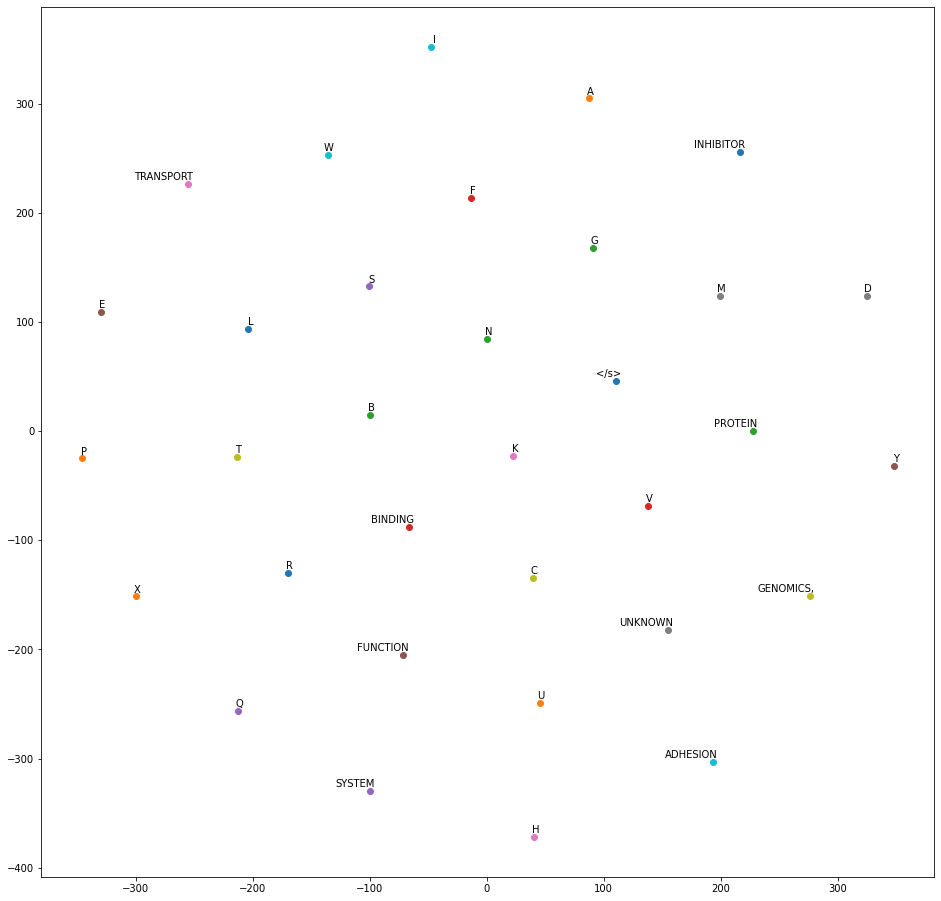

In [ ]:
tsne_plot(model)


# look at test and train dataset tsne

In [ ]:
test["labels"].iloc[0]

'__label__LIGASE M T A T E T V R V R F C P S P T G T P H V G L V R T A L F N W A Y A R H T G G T F V F R I E D T D A Q R D S E E S Y L A L L D A L R W L G L D W D E G P E V G G P Y G P Y R Q S Q R A E I Y R D V L A R L L A A G E A Y H A F S T P E E V E A R H V A A G R N P K L G Y D N F D R H L T D A Q R A A Y L A E G R Q P V V R L R M P D D D L A W N D L V R G P V T F A A G S V P D F A L T R A S G D P L Y T L V N P C D D A L M K I T H V L R G E D L L P S T P R Q L A L H Q A L I R I G V A E R I P K F A H L P T V L G E G T K K L S K R D P Q S N L F A H R D R G F I P E G L L N Y L A L L G W S I A D D H D L F G L D E M V A A F D V A D V N S S P A R F D Q K K A D A L N A E H I R M L D V G D F T V R L R D H L D T H G H H I A L D E A A F A A A A E L V Q T R I V V L G D A W E L L K F F N D D Q Y V I D P K A A A K E L G P D G A A V L D A A L A A L T S V T D W T A P L I E A A L K D A L I E G L A L K P R K A F S P I R V A A T G T T V S P P L F E S L E L L G R D R S M Q R L R A A R Q L V G H A L E

In [ ]:
test_seq = test["labels"].iloc[0]
test_seq =test_seq.split(' ', 1)[1]
test_seq

'M T A T E T V R V R F C P S P T G T P H V G L V R T A L F N W A Y A R H T G G T F V F R I E D T D A Q R D S E E S Y L A L L D A L R W L G L D W D E G P E V G G P Y G P Y R Q S Q R A E I Y R D V L A R L L A A G E A Y H A F S T P E E V E A R H V A A G R N P K L G Y D N F D R H L T D A Q R A A Y L A E G R Q P V V R L R M P D D D L A W N D L V R G P V T F A A G S V P D F A L T R A S G D P L Y T L V N P C D D A L M K I T H V L R G E D L L P S T P R Q L A L H Q A L I R I G V A E R I P K F A H L P T V L G E G T K K L S K R D P Q S N L F A H R D R G F I P E G L L N Y L A L L G W S I A D D H D L F G L D E M V A A F D V A D V N S S P A R F D Q K K A D A L N A E H I R M L D V G D F T V R L R D H L D T H G H H I A L D E A A F A A A A E L V Q T R I V V L G D A W E L L K F F N D D Q Y V I D P K A A A K E L G P D G A A V L D A A L A A L T S V T D W T A P L I E A A L K D A L I E G L A L K P R K A F S P I R V A A T G T T V S P P L F E S L E L L G R D R S M Q R L R A A R Q L V G H A L E H H H H H H'

In [ ]:
model.predict(test_seq, threshold = 0, k =-1)

(('__label__HYDROLASE',
  '__label__OXIDOREDUCTASE',
  '__label__LYASE',
  '__label__TRANSFERASE',
  '__label__ISOMERASE',
  '__label__LIGASE',
  '__label__TRANSCRIPTION',
  '__label__HYDROLASE/HYDROLASE',
  '__label__CHAPERONE',
  '__label__MEMBRANE',
  '__label__UNKNOWN',
  '__label__IMMUNE',
  '__label__TRANSPORT',
  '__label__PROTEIN',
  '__label__CELL',
  '__label__ELECTRON',
  '__label__SIGNALING',
  '__label__VIRAL',
  '__label__TOXIN',
  '__label__STRUCTURAL',
  '__label__DNA',
  '__label__RNA',
  '__label__METAL'),
 array([5.06904840e-01, 1.72322929e-01, 1.53942078e-01, 8.54150280e-02,
        2.57636718e-02, 2.36285497e-02, 1.41503271e-02, 5.03206206e-03,
        4.96497983e-03, 1.83048646e-03, 1.35228771e-03, 9.89460968e-04,
        9.43432038e-04, 6.31747593e-04, 4.72484098e-04, 3.78373370e-04,
        3.50057817e-04, 3.49379756e-04, 2.63765542e-04, 2.32761624e-04,
        1.76288158e-04, 1.07028129e-04, 2.80001368e-05]))

In [ ]:
model.get_word_vector(test_seq)


array([-5.68129821e-04,  1.62180187e-03, -9.83159407e-04,  6.52332033e-04,
       -6.20450999e-04,  3.54310469e-04,  1.98206306e-03, -3.00168438e-04,
        7.51105894e-04,  1.04057079e-03,  1.24743776e-04, -1.96586116e-04,
        3.25121364e-04,  1.23435468e-03,  7.74945715e-04,  6.27240748e-04,
        1.14436691e-04,  1.21462406e-04,  1.89349536e-04,  3.11758573e-04,
       -1.96858637e-05, -1.76172325e-04, -5.36614796e-04, -1.77807559e-03,
        1.25660363e-03,  9.15074605e-04,  8.41937726e-04, -3.17023223e-04,
       -4.63057426e-04,  1.45768793e-03, -3.64077219e-04, -1.27365789e-03,
       -1.71392609e-03,  1.76190515e-04,  1.15891895e-03,  6.53889205e-04,
        3.44353379e-04, -6.40990445e-04,  1.14512432e-03,  4.60250536e-04,
        2.21080612e-03,  2.51816731e-04, -3.27663380e-04,  6.83618127e-04,
       -1.83160402e-04, -1.23062730e-03, -1.41614687e-03,  5.40819135e-04,
       -3.59663070e-04, -5.14068124e-05, -2.14709388e-03,  9.03380977e-04,
       -9.98588279e-04,  

In [ ]:
def tsne_plot_train(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in test["labels"]:
        seq = word.split(' ', 1)[1]
        tokens.append(model.get_word_vector(seq))
        labels.append(word.split(' ', 1)[0])
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i]) 
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     #xytext=(5, 2),
                     #textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


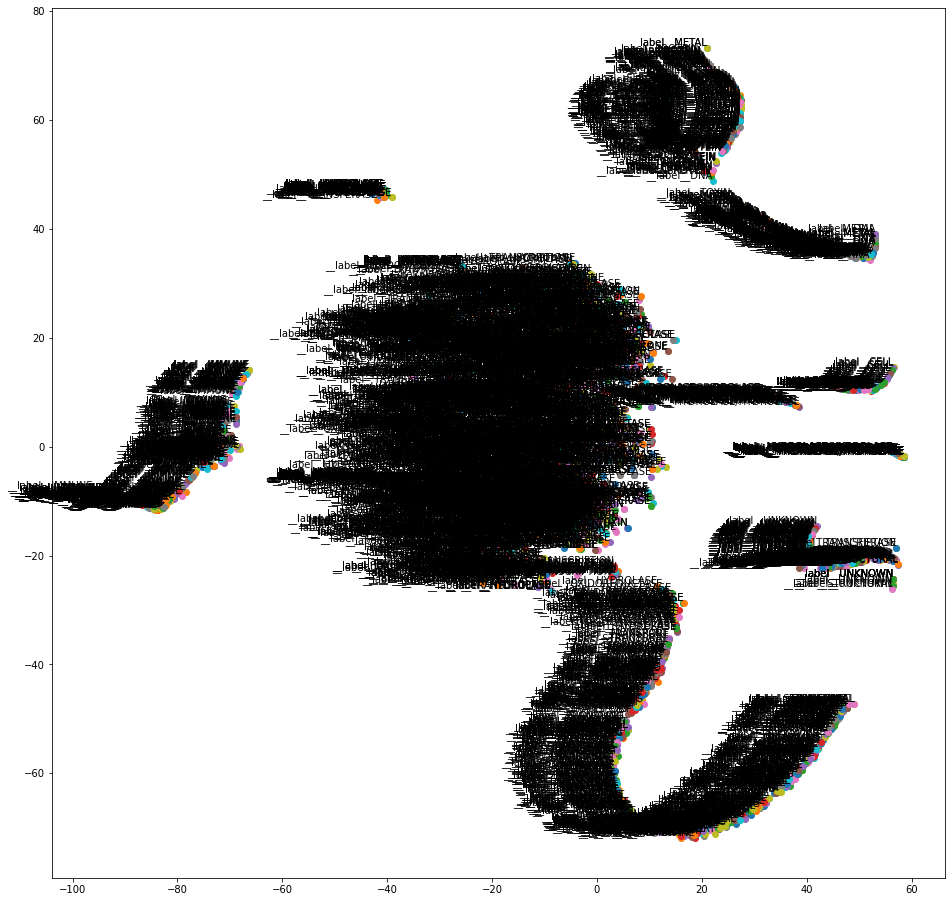

In [ ]:
tsne_plot_train(model)

# loading dataset


In [ ]:
human_data = pd.read_csv("dataset/human.txt")
dog_data = pd.read_csv("dataset/dog.txt")
chimp_data = pd.read_csv("dataset/chimpanzee.txt")

In [ ]:
human_data.iloc[0][0]

'ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG\t4'

In [ ]:
human_data

,sequence\tclass
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...
...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...


In [ ]:
human_data[['seq', 'category']] = human_data['sequence\tclass'].str.split('\t', 1, expand=True)
human_data

,sequence\tclass,seq,category
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
...,...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,0
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,6


In [ ]:
dog_data[['seq', 'category']] = dog_data['sequence\tclass'].str.split('\t', 1, expand=True)
chimp_data[['seq', 'category']] = chimp_data['sequence\tclass'].str.split('\t', 1, expand=True)


# verify that the split thing worked


In [ ]:
print(human_data.iloc[0][0])
print(human_data.iloc[0][1])

ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG	4
ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG


# fasttext time 


In [ ]:
human_data = human_data.drop(columns=['sequence\tclass'])
dog_data = dog_data.drop(columns=['sequence\tclass'])
chimp_data = chimp_data.drop(columns=['sequence\tclass'])
human_data

,seq,category
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,0
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,6


In [ ]:
human_data["category"].value_counts()

6    1343
4     711
3     672
1     534
0     531
2     349
5     240
Name: category, dtype: int64

In [ ]:
!pip install fasttext

     |████████████████████████████████| 68 kB 6.6 MB/s 
  Using cached pybind11-2.8.1-py2.py3-none-any.whl (208 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3123304 sha256=d664d2046091d116ddac3853bc9afd0bca4faee47f485b90bb3d8ed479e1ee64
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
training_data_total = [human_data, dog_data, chimp_data] #maybe in future can also add where each dataset came from 
training_data_total = pd.concat(training_data_total) #combine training data total
training_data_total

,seq,category
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
...,...,...
1677,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5
1678,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5
1679,ATGAAGCGACCCAAGGAGCCGAGCGGCTCCGACGGGGAGTCCGACG...,6
1680,ATGACTGGAACCCCAAAGACTCAAGAAGGAGCTAAAGATCTTGAAG...,3


In [ ]:
training_data_total['labels'] = "__label__"+ training_data_total['category'] + " " + training_data_total['seq'] #prep it for fasttext 


In [ ]:
training_data_total = training_data_total.drop(columns=['seq', "category"])
training_data_total

,labels
0,__label__4 ATGCCCCAACTAAATACTACCGTATGGCCCACCAT...
1,__label__4 ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCC...
2,__label__3 ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGA...
3,__label__3 ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGA...
4,__label__3 ATGCAACAGCATTTTGAATTTGAATACCAGACCAA...
...,...
1677,__label__5 ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGG...
1678,__label__5 ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGG...
1679,__label__6 ATGAAGCGACCCAAGGAGCCGAGCGGCTCCGACGG...
1680,__label__3 ATGACTGGAACCCCAAAGACTCAAGAAGGAGCTAA...


In [ ]:
training_data_ngrams = training_data_total.copy()

# preparing for training

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(training_data_total, test_size = 0.15)
print(training_data_total.shape)
print(train)
print(test)

(6882, 1)
                                                 labels
3138  __label__5 ATGGGTTTGTCACTGCCCAAGGAGAAAGGGCTAAT...
2256  __label__4 ATGGTGTTGGTGCTGGATTACTCAGGTCGCCCAAT...
4075  __label__4 ATGCCTTCTGAGACCCCCCAGGCAGAAGTGGGGCC...
1514  __label__5 NNGGCGGCCCTGTACCCGAGCACGGACCTCTCGGG...
3065  __label__1 ATGTCTGGGGTGTCCGAGCCCCTGAGTCGAGTAAA...
...                                                 ...
765   __label__6 ATGGCCACCCAGGTAATGGGGCAGTCTTCTGGAGG...
1407  __label__5 ATGGCTCAGTTCTATTACAAAAGAAATGTTAATGC...
1199  __label__0 NNGGAGGGATCAACCATTTCTTGTGTGGTTGAGAG...
853   __label__4 ATGCTCGGCGCCAAAGCTGATGGTGAGACCATTCT...
1778  __label__1 ATGAAGCCGGCGACAGGACTTTGGGTCTGGGTGAG...

[5849 rows x 1 columns]
                                                 labels
424   __label__1 GCTGTGCTCTTTTCCTCAGGGGAAGTGGAGGTTCC...
1518  __label__6 ATGATTCAGACTGTCCCGGACCCAGCAGCTCATAT...
1743  __label__3 ATGCCCCTGCTCGGACTTCTTCCCAGGAGGGCCTG...
1821  __label__0 ATGGAGCCACCCGGACGCCGGCGGGGCCGCGCGCA...
2816  __label

In [ ]:
np.savetxt('data.train', train['labels'].values, fmt='%s')
np.savetxt('data.test', test['labels'].values, fmt='%s')

In [ ]:
import fasttext

In [ ]:
model = fasttext.train_supervised(input="data.train", wordNgrams = 2, epoch = 25, lr = 1.0, verbose = 2, minn = 6, maxn = 6) #wow char ngrams make huge difference 
print("Model trained")
model.save_model("model1.bin")

Model trained


In [ ]:
print(model.test("data.test")) #why do 6 ngrams work so well? wtf 

(1033, 0.9506292352371732, 0.9506292352371732)


In [ ]:
model.words

In [ ]:
model.get_word_vector("ATGGAGAGCACCCCTTCAAGGGGACTGAACCGAGTACACCTACAATGCAGGAATCTGCAGGAATTCTTAGGGGGCCTGAGCCCTGGGGTATTGGACCGATTGTATGGGCACCCTGCCACATGTCTGGCTGTCTTCAGGGAGCTCCCATCCTTGGCTAAGAACTGGGTGATGCGGATGCTCTTTCTGGAGCAGCCTTTGCCACAGGCTGCTGTAGCTCTGTGGGTAAAGAAGGAATTCAGCAAGGCTCAGGAGGAAAGTACAGGGCTGCTGAGCGGCCTCCGGATCTGGCACACACAGCTGCTCCCAGGCGGGCTCCAGGGCCTCATCCTCAACCCCATTTTCCGCCAGAACCTCCGCATTGCCCTTCTGGGTGGGGGGAAGGCCTGGTCTGATGACACAAGTCAGCTGGGACCAGACAAGCATGCCCGGGACGTTCCCTCCCTTGACAAGTACGCCGAGGAGCGATGGGAGGTGGTCTTGCACTTCATGGTGGGCTCCCCCAGTGCAGCTGTCAGCCAGGACTTGGCTCAGCTCCTCAGCCAGGCTGGGCTCATGAAGAGTACTGAACCTGGAGAGCCGCCCTGCATTACTTCCGCTGGCTTCCAGTTCCTGTTGCTGGACACCCCGGCTCAGCTCTGGTACTTTATGTTGCAGTATTTGCAGACAGCCCAGAGCCGGGGCATGGACCTGGTAGAGATTCTCTCCTTCCTCTTCCAGCTCAGCTTCTCTACTCTGGGCAAGGATTACTCTGTGGAAGGTATGAGTGATTCTCTGTTGAACTTCCTGCAACATCTGCGTGAGTTTGGGCTTGTTTTCCAGAGGAAGAGGAAATCTCGGCGTTACTACCCCACACGCCTGGCCATCAATCTCTCATCAGGTGTCTCTGGAGCTGGGGGCACTGTGCATCAGCCAGGTTTCATTGTCGTGGAAACCAATTACCGACTGTATGCCTACACGGAGTCGGAGCTGCAGATTGCCCTCATTGCCCTCTTCTCTGAGATGCTCTATCGGTTCCCCAACATGGTGGTGGCGCAGGTGACCCGGGAGAGTGTGCAGCAGGCAATCGCCAGTGGCATCACAGCCCAGCAGATAATCCATTTCCTAAGGACAAGAGCCCACCCAGTGATGCTCAAACAGACACCTGTGCTGCCCCCCACCATCACCGACCAGATCCGGCTCTGGGAGCTGGAAAGGGACAGACTCCGGTTCACTGAGGGTGTCCTGTATAACCAGTTCCTGTCGCAAGTGGACTTTGAGCTGCTGCTGGCCCACGCGCGGGAGCTGGGCGTGCTCGTGTTCGAGAACTCGGCCAAGCGGCTCATGGTGGTGACCCCGGCCGGGCACAGCGACGTCAAGCGCTTTTGGAAGCGGCAGAAACATAGCTCCTGA")

array([-0.01225285, -0.0041708 , -0.01020308, -0.04164562, -0.01295575,
        0.01298699,  0.02209253,  0.00587389,  0.01372315,  0.00182248,
       -0.00732105,  0.03110189,  0.00976568, -0.00468092,  0.00865284,
       -0.01270425, -0.01519698, -0.02102446, -0.00681248, -0.00039989,
       -0.00620295,  0.00791078,  0.00733191, -0.00639639,  0.0052957 ,
        0.01100799,  0.00257221, -0.00321197,  0.00029781,  0.01364868,
       -0.0019991 ,  0.03083717, -0.01058455,  0.01855282, -0.02920644,
        0.01152843,  0.00868467,  0.01363738, -0.00758122,  0.03563107,
        0.02554462,  0.00729147,  0.01674617, -0.00045808, -0.01873901,
        0.00972006, -0.01032638,  0.01394786, -0.00781143,  0.00042887,
       -0.02908575,  0.00359584, -0.00083332,  0.01564942, -0.04393192,
       -0.00148549, -0.00149857, -0.00467917,  0.00399694,  0.01009116,
        0.01177951, -0.00455616,  0.01917124,  0.03496069, -0.00198734,
       -0.01538124,  0.03863914,  0.00438069,  0.01078021,  0.01

# manual n-grams/k-mers


In [ ]:
def getNGram(text, n):
  string = [text[i:i+n] for i in range(len(text)-n+1)]
  result = ' '.join(m for m in string)
  return result


In [ ]:
getNGram("hello there", 3) #don't need to worry about the spaces for now 

'hel ell llo lo  o t  th the her ere'

In [ ]:
training_data_ngrams['nGram'] = training_data_ngrams['seq'].apply(getNGram, n = 3)

In [ ]:
training_data_ngrams

,seq,category,nGram
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,ATG TGC GCC CCC CCC CCA CAA AAC ACT CTA TAA AA...
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,ATG TGA GAA AAC ACG CGA GAA AAA AAA AAT ATC TC...
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,ATG TGT GTG TGT GTG TGG GGC GCA CAT ATT TTT TT...
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,ATG TGT GTG TGT GTG TGG GGC GCA CAT ATT TTT TT...
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,ATG TGC GCA CAA AAC ACA CAG AGC GCA CAT ATT TT...
...,...,...,...
1677,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5,ATG TGC GCT CTG TGA GAG AGC GCG CGG GGA GAG AG...
1678,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5,ATG TGC GCT CTG TGA GAG AGC GCG CGG GGA GAG AG...
1679,ATGAAGCGACCCAAGGAGCCGAGCGGCTCCGACGGGGAGTCCGACG...,6,ATG TGA GAA AAG AGC GCG CGA GAC ACC CCC CCA CA...
1680,ATGACTGGAACCCCAAAGACTCAAGAAGGAGCTAAAGATCTTGAAG...,3,ATG TGA GAC ACT CTG TGG GGA GAA AAC ACC CCC CC...


In [ ]:
training_data_ngrams['labels'] = "__label__"+ training_data_ngrams['category'] + " " + training_data_ngrams['nGram'] #prep it for fasttext 
training_data_ngrams

,seq,category,nGram,labels
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,ATG TGC GCC CCC CCC CCA CAA AAC ACT CTA TAA AA...,__label__4 ATG TGC GCC CCC CCC CCA CAA AAC ACT...
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,ATG TGA GAA AAC ACG CGA GAA AAA AAA AAT ATC TC...,__label__4 ATG TGA GAA AAC ACG CGA GAA AAA AAA...
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,ATG TGT GTG TGT GTG TGG GGC GCA CAT ATT TTT TT...,__label__3 ATG TGT GTG TGT GTG TGG GGC GCA CAT...
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,ATG TGT GTG TGT GTG TGG GGC GCA CAT ATT TTT TT...,__label__3 ATG TGT GTG TGT GTG TGG GGC GCA CAT...
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,ATG TGC GCA CAA AAC ACA CAG AGC GCA CAT ATT TT...,__label__3 ATG TGC GCA CAA AAC ACA CAG AGC GCA...
...,...,...,...,...
1677,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5,ATG TGC GCT CTG TGA GAG AGC GCG CGG GGA GAG AG...,__label__5 ATG TGC GCT CTG TGA GAG AGC GCG CGG...
1678,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5,ATG TGC GCT CTG TGA GAG AGC GCG CGG GGA GAG AG...,__label__5 ATG TGC GCT CTG TGA GAG AGC GCG CGG...
1679,ATGAAGCGACCCAAGGAGCCGAGCGGCTCCGACGGGGAGTCCGACG...,6,ATG TGA GAA AAG AGC GCG CGA GAC ACC CCC CCA CA...,__label__6 ATG TGA GAA AAG AGC GCG CGA GAC ACC...
1680,ATGACTGGAACCCCAAAGACTCAAGAAGGAGCTAAAGATCTTGAAG...,3,ATG TGA GAC ACT CTG TGG GGA GAA AAC ACC CCC CC...,__label__3 ATG TGA GAC ACT CTG TGG GGA GAA AAC...


In [ ]:
training_data_ngrams['seq'].iloc[2]

'ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTGTTCAGTGTCTGAGTGCTATGAAGATTGCACACAGAGGTCCAGATGCATTCCGTTTTGAGAATGTCAATGGATACACCAACTGCTGCTTTGGATTTCACCGGTTGGCGGTAGTTGACCCGCTGTTTGGAATGCAGCCAATTCGAGTGAAGAAATATCCGTATTTGTGGCTCTGTTACAATGGTGAAATCTACAACCATAAGAAGATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTGAGATAATCCTTCATCTTTATGACAAAGGAGGAATTGAGCAAACAATTTGTATGTTGGATGGTGTGTTTGCATTTGTTTTACTGGATACTGCCAATAAGAAAGTGTTCCTGGGTAGAGATACATATGGAGTCAGACCTTTGTTTAAAGCAATGACAGAAGATGGATTTTTGGCTGTATGTTCAGAAGCTAAAGGTCTTGTTACATTGAAGCACTCCGCGACTCCCTTTTTAAAAGTGGAGCCTTTTCTTCCTGGACACTATGAAGTTTTGGATTTAAAGCCAAATGGCAAAGTTGCATCCGTGGAAATGGTTAAATATCATCACTGTCGGGATGTACCCCTGCACGCCCTCTATGACAATGTGGAGAAACTCTTTCCAGGTTTTGAGATAGAAACTGTGAAGAACAACCTCAGGATCCTTTTTAATAATGCTGTAAAGAAACGTTTGATGACAGACAGAAGGATTGGCTGCCTTTTATCAGGGGGCTTGGACTCCAGCTTGGTTGCTGCCACTCTGTTGAAGCAGCTGAAAGAAGCCCAAGTACAGTATCCTCTCCAGACATTTGCAATTGGCATGGAAGACAGCCCCGATTTACTGGCTGCTAGAAAGGTGGCAGATCATATTGGAAGTGAACATTATGAAGTCCTTTTTAACTCTGAGGAAGGCATTCAGGCTCTGGATGAAGTCATATTTTCCTTGGAAACT

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(training_data_ngrams, test_size = 0.15)
print(training_data_ngrams.shape)
print(train)
print(test)

(6882, 4)
                                                    seq  ...                                             labels
1684  ATGTGGCCATCGCAGCTACTAATTTTCATGATGCTCTTAGCTCCAA...  ...  __label__0 ATG TGT GTG TGG GGC GCC CCA CAT ATC...
477   ATGAAGGAGGCCGCCCTCATCTGCCTGGCACCCTCTGTACCCCCGA...  ...  __label__1 ATG TGA GAA AAG AGG GGA GAG AGG GGC...
1277  ATGGAGAGTGCAATCACGCTGTGGCAGTTCCTGTTGCAGTTGCTGC...  ...  __label__6 ATG TGG GGA GAG AGA GAG AGT GTG TGC...
3699  ATGGGGGGTTTTCTACCTAAGGCAGAAGGGCCCGGGAGCCAACTCC...  ...  __label__5 ATG TGG GGG GGG GGG GGG GGT GTT TTT...
1049  ATGGTTATGAATCTGGCTGATCTCAAAAAATATATGGAGGAGGCGA...  ...  __label__4 ATG TGG GGT GTT TTA TAT ATG TGA GAA...
...                                                 ...  ...                                                ...
1211  ATGTTGACGCAAGCTGCTGTAAGGCTTGTTAGGGGGTCTCTGCGCA...  ...  __label__3 ATG TGT GTT TTG TGA GAC ACG CGC GCA...
2609  ATGTCATGGATCAAGGAAGGAGAGCTGTCACTTTGGGAGCGGTTCT...  ...  __label__4 ATG TGT GTC TCA CAT A

In [ ]:
np.savetxt('data.train', train['labels'].values, fmt='%s')
np.savetxt('data.test', test['labels'].values, fmt='%s')

In [ ]:
model = fasttext.train_supervised(input="data.train", wordNgrams = 3, epoch = 25, lr = 1.0, verbose = 2) #first try without minn and maxn, word ngrams will now be char ngrams i believe 
print("Model trained")
model.save_model("model1.bin")

Model trained


In [ ]:
print(model.test("data.test")) #interesting word n grams = 2 and char ngrams = 3 gives 73% where the pure ngrams did better 

(1033, 0.8712487899322362, 0.8712487899322362)


In [ ]:
len(model.words) #101 amino acid sequneces? 
model.words

['CTG',
 'CAG',
 'TGG',
 'CCA',
 'GGA',
 'AGA',
 'CCT',
 'GCC',
 'GAG',
 'GAA',
 'CCC',
 'AAG',
 'AGC',
 'GGC',
 'GCT',
 'TGC',
 'AAA',
 'AGG',
 'TGA',
 'GCA',
 'CAA',
 'ATG',
 'TCA',
 'GTG',
 'ACA',
 'TCC',
 'CTC',
 'ACC',
 'GGG',
 'CAC',
 'CAT',
 'TCT',
 'TTC',
 'CTT',
 'GAC',
 'TGT',
 'GAT',
 'ATC',
 'TTT',
 'AAC',
 'ACT',
 'TTG',
 'AGT',
 'AAT',
 'ATT',
 'GGT',
 'GTC',
 'CCG',
 'CGG',
 'TAC',
 'GTT',
 'CTA',
 'TAT',
 'CGC',
 'GCG',
 'ATA',
 'TTA',
 'CGA',
 'TAA',
 'ACG',
 'GTA',
 'TCG',
 'CGT',
 'TAG',
 '</s>',
 'NNN',
 'NNG',
 'NNC',
 'NAG',
 'NGG',
 'NTG',
 'NNA',
 'NGC',
 'NGA',
 'NCA',
 'NNT',
 'NGT',
 'NAT',
 'NCC',
 'NCT',
 'NAA',
 'NTC',
 'NTT',
 'NAC',
 'NCG',
 'GNN',
 'NTA',
 'TGN',
 'AGN',
 'ANN',
 'CNC',
 'GTN',
 'TNC',
 'ACN',
 'CNN',
 'GGN',
 'CCN',
 'CNG',
 'AAN',
 'GNC',
 'TCN']

In [ ]:
#model.get_nearest_neighbors('GAT')
model.get_analogies("TCG", "AGT", "AGC")

[(0.8657426834106445, 'NGG'),
 (0.7826845049858093, 'NNG'),
 (0.6739778518676758, 'CTT'),
 (0.6351768970489502, 'CTC'),
 (0.6347893476486206, 'NGA'),
 (0.6293121576309204, 'GCA'),
 (0.5820811986923218, 'GCT'),
 (0.5625976920127869, 'CGA'),
 (0.5281616449356079, 'TAG'),
 (0.5279024243354797, 'GAA')]